In [2]:
import sys; sys.path.append("../")
from feature_extractor import FeatureExtractor
import torch
import numpy as np
import time
from cascade import CascadeClassifier
import cv2

In [3]:
torch.cuda.is_available()

True

In [4]:
parent = '../hFeatures3_2/'
data_path = 'new_data3'

# Features Extraction

In [5]:
mean = 111.02404842061983
std = 56.926623499738575

In [5]:
def transform1(img):
  return img
  # img = (img - img.mean()) / (img.std() + 1e-8)
  # return cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

In [6]:

feature_extractor = FeatureExtractor(shape=(19,19), 
                                     percentile=20,
                                     all_features_file=parent + "all_features.npz",
                                     selected_features_file=parent + "selected_features.npz",
                                     labels_file=parent + "labels.npy",
                                     indecies_file=parent + "indecies.npy",)

In [7]:

X, y = feature_extractor.extractFeatures(pos_path='../'+data_path+'/train/face', 
                                  neg_path='../'+data_path+'/train/non-face',
                                  transform=transform1,
                                  save_to_file=False)
print('done')


all_features shape: (63960, 10826)
done


In [8]:
# del feature_extractor.f2
# del feature_extractor.f3
# del feature_extractor.f4

In [9]:
indecies, X = feature_extractor.selectPercentile(X, y )
# y = np.load(parent + 'labels.npy')
print(X.shape, y.shape)
print('done')


Now selecting percentile features
(12792, 10826) (10826,)
done


In [10]:
# temp = np.load('../hFeatures3/all_features.npz')['arr_0']
temp = X
temp 

array([[  89., -146.,  118., ...,  -17.,  -51.,  -32.],
       [ 253.,  -35.,  280., ...,  -22., -178.,  -33.],
       [ -46.,  127.,  -83., ...,    9.,    6.,  -12.],
       ...,
       [-111.,  -27.,  -27., ...,   -1.,    1.,    8.],
       [  78., -149.,  -81., ...,   -1.,    7.,   20.],
       [  96., -109.,  -28., ...,    3.,    1.,    5.]], dtype=float32)

In [11]:
print(temp.min())
print(temp.max())
print(temp[3])
print(temp[4])

-30493.0
28166.0
[ 434.  123.  439. ...   -4. -218.   -7.]
[-115.   84. -116. ...    7.   -2.  -12.]


# Training

In [12]:
[20]*10

[20, 20, 20, 20, 20, 20, 20, 20, 20, 20]

In [13]:
%rm StrongClassifier/lastSC.last
s_t = time.time()
cascadeClassifier= CascadeClassifier(X, y, batchsize=5000, verbose=True, layers=[20]*10)
tr_acc = cascadeClassifier.train()

cascadeClassifier.save(parent + 'cascadeClassifier.pkl')

print('accuracy: ', tr_acc)
print('time taken: ', time.time() - s_t, 's')
print('done')

$$$$$$$ Training layer 1 / 10 $$$$$$$
Starting to choose classifier
Finished training weak classifier 1 / 20
Starting to choose classifier
Finished training weak classifier 2 / 20
Starting to choose classifier
Finished training weak classifier 3 / 20
Starting to choose classifier
Finished training weak classifier 4 / 20
Starting to choose classifier
Finished training weak classifier 5 / 20
Starting to choose classifier
Finished training weak classifier 6 / 20
Starting to choose classifier
Finished training weak classifier 7 / 20
Starting to choose classifier
Finished training weak classifier 8 / 20
Starting to choose classifier
Finished training weak classifier 9 / 20
Starting to choose classifier
Finished training weak classifier 10 / 20
Starting to choose classifier
Finished training weak classifier 11 / 20
Starting to choose classifier
Finished training weak classifier 12 / 20
Starting to choose classifier
Finished training weak classifier 13 / 20
Starting to choose classifier
Finis

# Testing

In [14]:
# accuracy imports
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


In [15]:
s_t = time.time()
t_f_idx_map, t_features, t_labels = feature_extractor.extractFeaturesByIndecies(pos_path='../'+data_path+'/test/face', 
                                            neg_path='../'+data_path+'/test/non-face',
                                            cascadeClassifier=cascadeClassifier,
                                            transform=transform1)
print(t_features.shape, t_labels.shape)
predictions = cascadeClassifier.predict(t_features, t_f_idx_map)
print('test accuracy: ', np.sum(predictions == t_labels) / t_labels.shape[0])
print('time taken: ', time.time() - s_t, 's')

Now reading dataset...
Now extracting features from dataset...
(58, 2715) (2715,)
test accuracy:  0.9502762430939227
time taken:  1.3139371871948242 s


In [16]:
# report
print('accuracy: ', accuracy_score(t_labels, predictions))
print('f1 score macro: ', f1_score(t_labels, predictions, average='macro'))
print('f1 score binary: ', f1_score(t_labels, predictions))
print('f1 score micro: ', f1_score(t_labels, predictions, average='micro'))
print('precision: ', precision_score(t_labels, predictions))
print('recall: ', recall_score(t_labels, predictions))
print('confusion matrix: \n', confusion_matrix(t_labels, predictions))
print('classification report: \n', classification_report(t_labels, predictions, digits=4))


accuracy:  0.9502762430939227
f1 score macro:  0.9421790830654007
f1 score binary:  0.920541494997057
f1 score micro:  0.9502762430939227
precision:  0.9848866498740554
recall:  0.8640883977900552
confusion matrix: 
 [[1798   12]
 [ 123  782]]
classification report: 
               precision    recall  f1-score   support

           0     0.9360    0.9934    0.9638      1810
           1     0.9849    0.8641    0.9205       905

    accuracy                         0.9503      2715
   macro avg     0.9604    0.9287    0.9422      2715
weighted avg     0.9523    0.9503    0.9494      2715



# Try full image

In [17]:
# !mkdir /content/drive/MyDrive/GP/GP_try/hFeatures3_2
# !cp -r ../hFeatures3_2/* /content/drive/MyDrive/GP/GP_try/hFeatures3_2

mkdir: cannot create directory ‘/content/drive/MyDrive/GP/GP_try/hFeatures3_2’: File exists


In [18]:
# !mkdir ../../lfw_all
# !cp /content/drive/MyDrive/GP/lfw_all/* ../../lfw_all/

In [19]:
import random
from detect_face import find_face
from PIL import Image
import os
import matplotlib.pyplot as plt
lfw_all = '../../lfw_all/'
all_images_names = os.listdir(lfw_all)
# all_images_names = sorted(all_images_names)
random.shuffle(all_images_names)
all_images_names = [lfw_all + name for name in all_images_names]
all_images_names[0]

'../../lfw_all/Jorma_Huhtala_0001.jpg'

In [20]:
show_images = list(range(0, 20))
rectangles_only = True
# resize_to = (100, 100)
random.shuffle(all_images_names)

In [21]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [22]:
feature_extractor.verbose = False

RGB
(250, 250)


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


{'Getting Subwindows': 0.2410905361175537, 'Resizing Subwindows': 0.33417630195617676, 'Normalize': 1.049041748046875e-05, 'Extracting Features': 0.2748990058898926, 'Classifying': 0.35996556282043457}


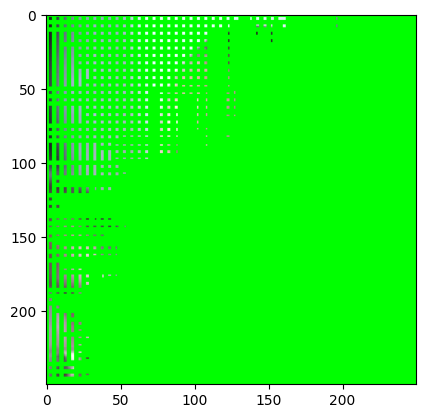

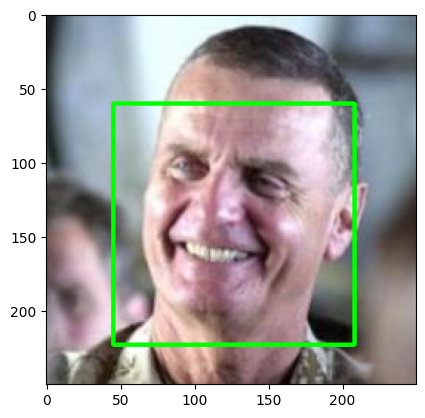

RGB
(250, 250)
{'Getting Subwindows': 0.23251652717590332, 'Resizing Subwindows': 0.4500548839569092, 'Normalize': 1.71661376953125e-05, 'Extracting Features': 0.33337903022766113, 'Classifying': 0.40879225730895996}


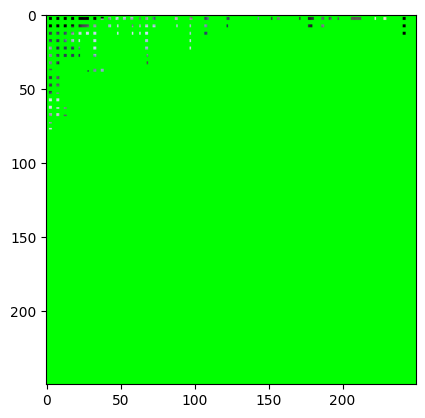

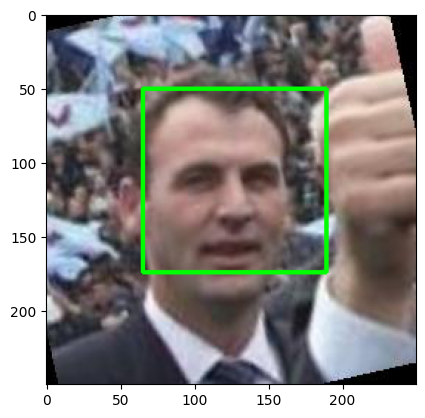

RGB
(250, 250)
{'Getting Subwindows': 0.24027562141418457, 'Resizing Subwindows': 0.48641324043273926, 'Normalize': 1.5020370483398438e-05, 'Extracting Features': 0.3611438274383545, 'Classifying': 0.4174044132232666}


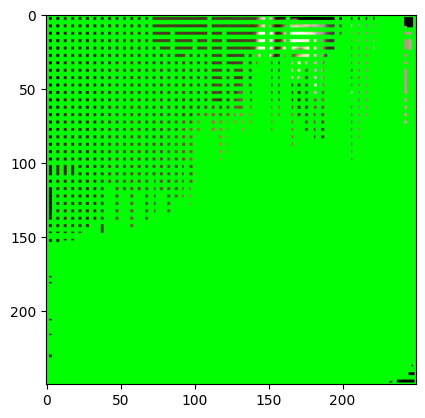

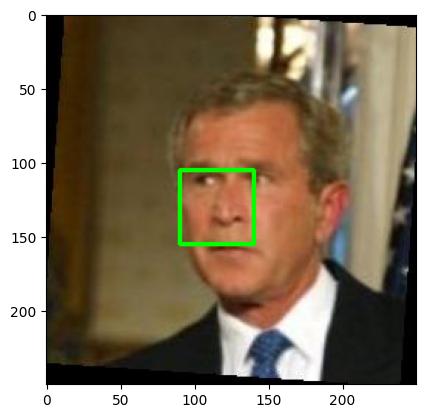

RGB
(250, 250)
{'Getting Subwindows': 0.10149216651916504, 'Resizing Subwindows': 0.3186321258544922, 'Normalize': 9.775161743164062e-06, 'Extracting Features': 0.2576286792755127, 'Classifying': 0.24703359603881836}


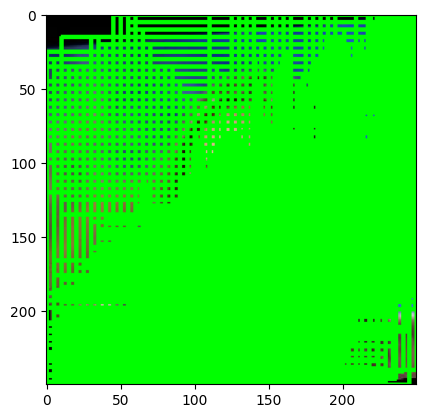

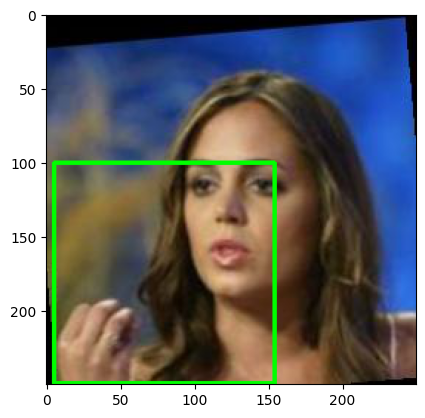

RGB
(250, 250)
{'Getting Subwindows': 0.09306716918945312, 'Resizing Subwindows': 0.3130970001220703, 'Normalize': 1.049041748046875e-05, 'Extracting Features': 0.26451730728149414, 'Classifying': 0.24824047088623047}


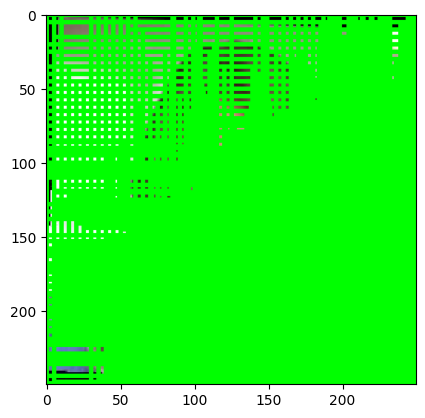

RGB
(250, 250)
{'Getting Subwindows': 0.09210419654846191, 'Resizing Subwindows': 0.3202648162841797, 'Normalize': 1.2159347534179688e-05, 'Extracting Features': 0.25957465171813965, 'Classifying': 0.2727956771850586}


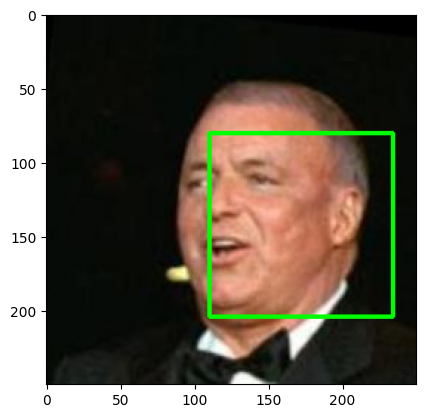

RGB
(250, 250)
{'Getting Subwindows': 0.09043097496032715, 'Resizing Subwindows': 0.30466437339782715, 'Normalize': 1.049041748046875e-05, 'Extracting Features': 0.2551276683807373, 'Classifying': 0.24895286560058594}


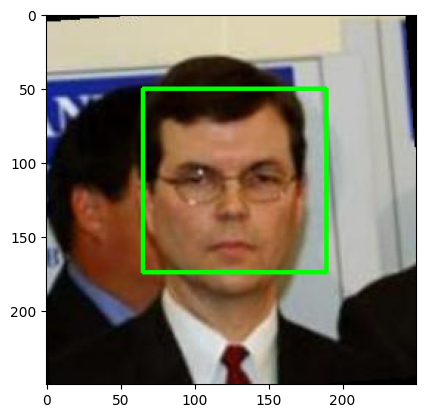

RGB
(250, 250)
{'Getting Subwindows': 0.09510660171508789, 'Resizing Subwindows': 0.31250786781311035, 'Normalize': 1.1920928955078125e-05, 'Extracting Features': 0.27080798149108887, 'Classifying': 0.2774662971496582}


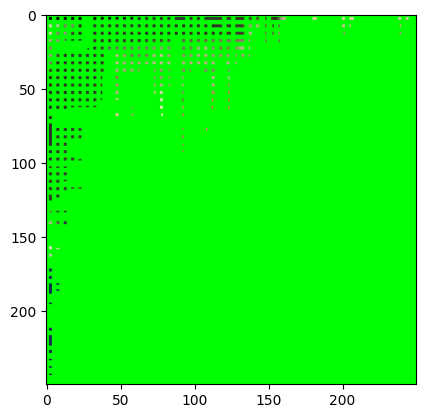

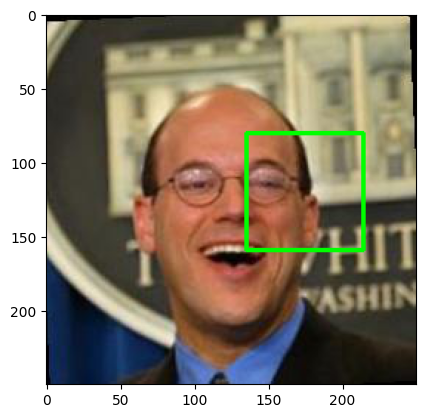

RGB
(250, 250)
{'Getting Subwindows': 0.09262824058532715, 'Resizing Subwindows': 0.31302738189697266, 'Normalize': 1.1444091796875e-05, 'Extracting Features': 0.27075958251953125, 'Classifying': 0.27376723289489746}


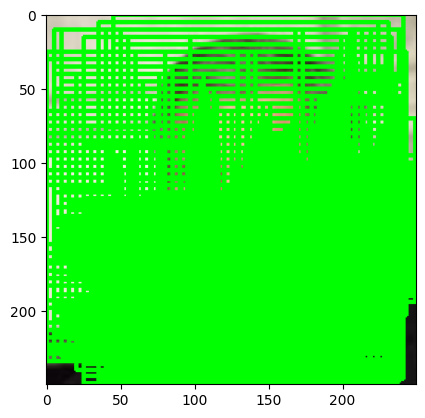

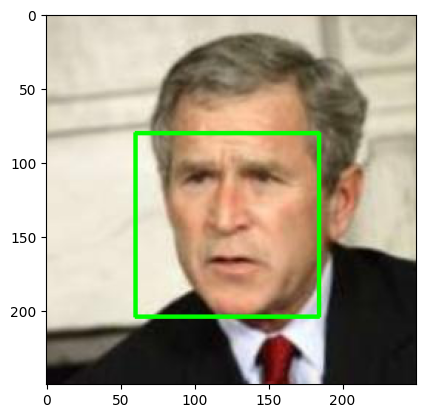

RGB
(250, 250)
{'Getting Subwindows': 0.09518980979919434, 'Resizing Subwindows': 0.37840962409973145, 'Normalize': 1.3589859008789062e-05, 'Extracting Features': 0.2859506607055664, 'Classifying': 0.2875068187713623}


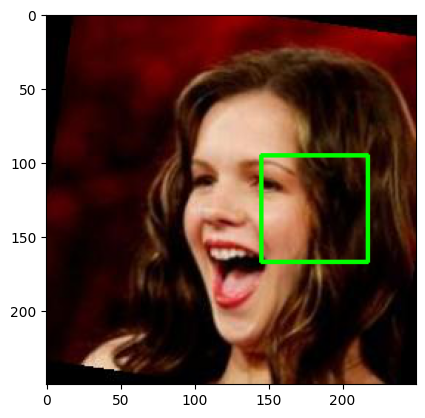

RGB
(250, 250)
{'Getting Subwindows': 0.09632682800292969, 'Resizing Subwindows': 0.4780547618865967, 'Normalize': 1.8835067749023438e-05, 'Extracting Features': 0.35098934173583984, 'Classifying': 0.42997121810913086}


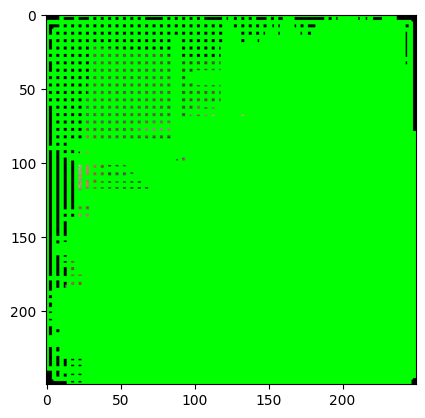

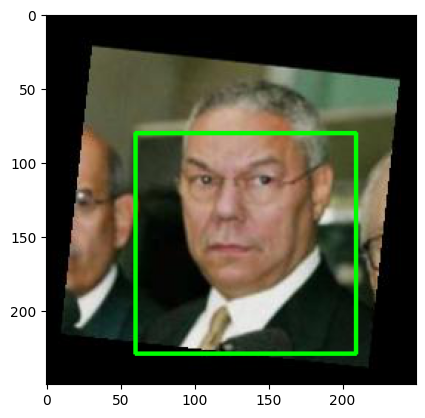

RGB
(250, 250)
{'Getting Subwindows': 0.10360431671142578, 'Resizing Subwindows': 0.4701714515686035, 'Normalize': 1.4543533325195312e-05, 'Extracting Features': 0.3403584957122803, 'Classifying': 0.3769237995147705}


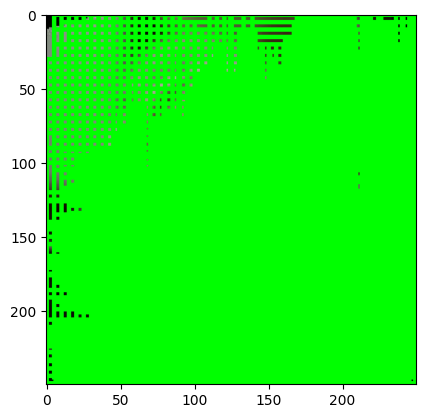

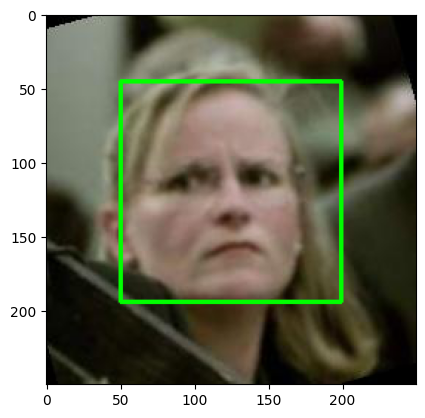

RGB
(250, 250)
{'Getting Subwindows': 0.09398865699768066, 'Resizing Subwindows': 0.31975507736206055, 'Normalize': 1.3113021850585938e-05, 'Extracting Features': 0.26285839080810547, 'Classifying': 0.2710914611816406}


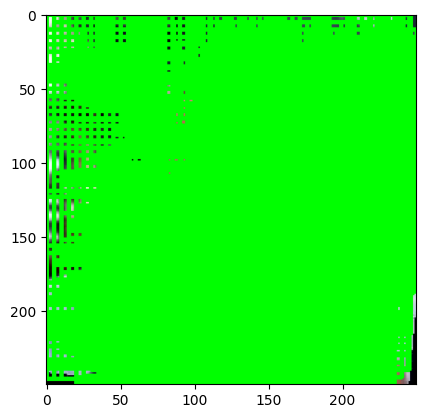

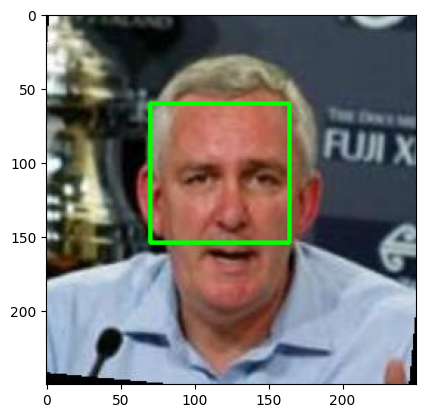

RGB
(250, 250)
{'Getting Subwindows': 0.08877849578857422, 'Resizing Subwindows': 0.32156872749328613, 'Normalize': 1.0728836059570312e-05, 'Extracting Features': 0.2546370029449463, 'Classifying': 0.25485849380493164}


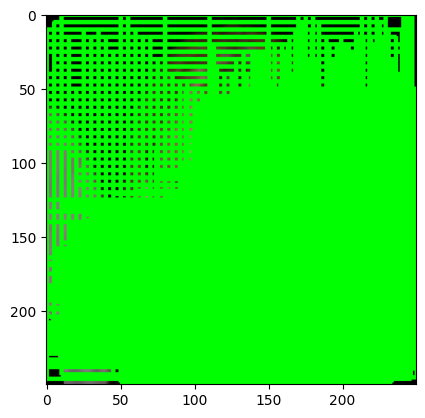

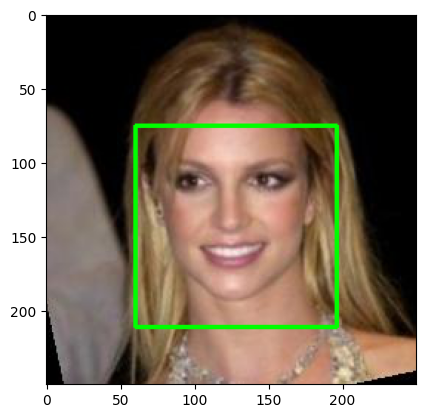

RGB
(250, 250)
{'Getting Subwindows': 0.09556078910827637, 'Resizing Subwindows': 0.33265185356140137, 'Normalize': 1.3828277587890625e-05, 'Extracting Features': 0.27937984466552734, 'Classifying': 0.28113412857055664}


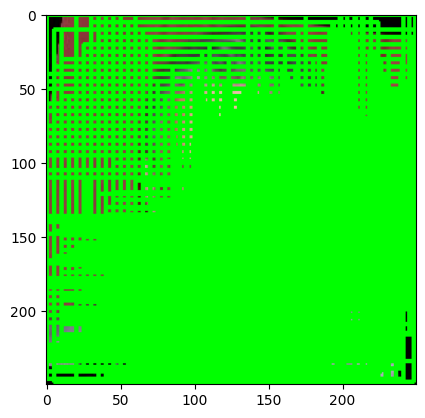

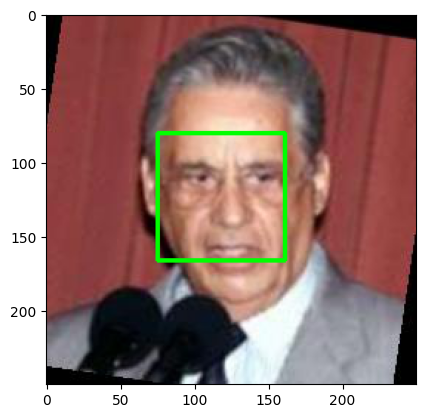

RGB
(250, 250)
{'Getting Subwindows': 0.18248534202575684, 'Resizing Subwindows': 0.33847618103027344, 'Normalize': 1.4543533325195312e-05, 'Extracting Features': 0.27228713035583496, 'Classifying': 0.28226137161254883}


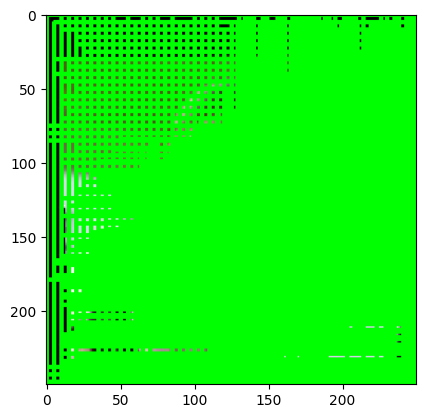

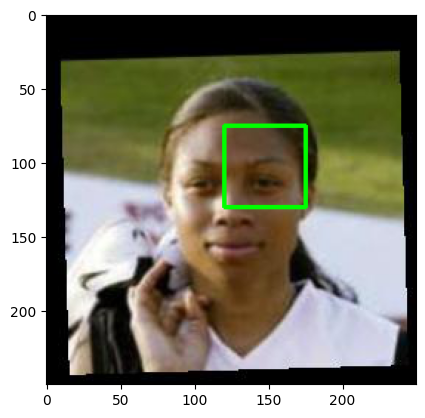

RGB
(250, 250)
{'Getting Subwindows': 0.18189167976379395, 'Resizing Subwindows': 0.33943748474121094, 'Normalize': 1.3113021850585938e-05, 'Extracting Features': 0.27519822120666504, 'Classifying': 0.28954195976257324}


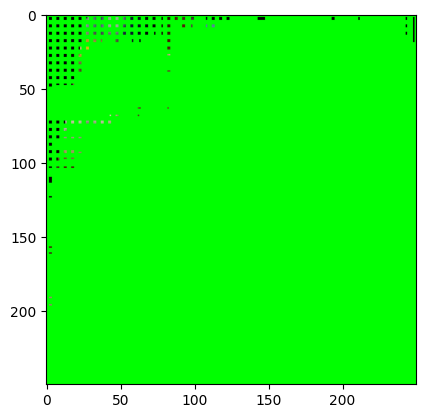

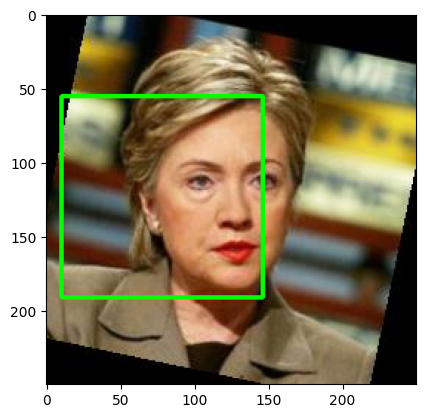

RGB
(250, 250)
{'Getting Subwindows': 0.0939178466796875, 'Resizing Subwindows': 0.3424041271209717, 'Normalize': 1.1920928955078125e-05, 'Extracting Features': 0.269744873046875, 'Classifying': 0.2673935890197754}


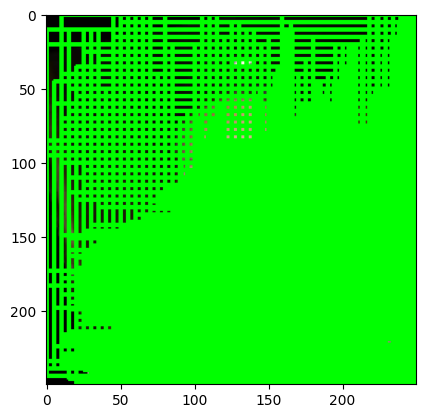

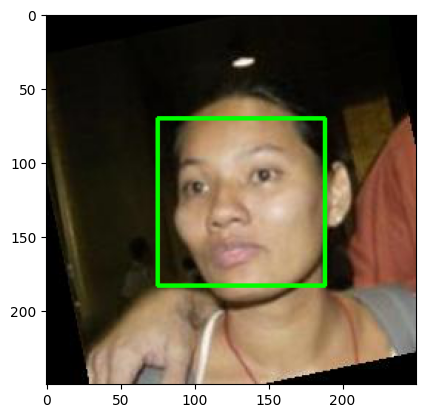

RGB
(250, 250)
{'Getting Subwindows': 0.09913468360900879, 'Resizing Subwindows': 0.42866015434265137, 'Normalize': 1.5497207641601562e-05, 'Extracting Features': 0.3252706527709961, 'Classifying': 0.40453553199768066}


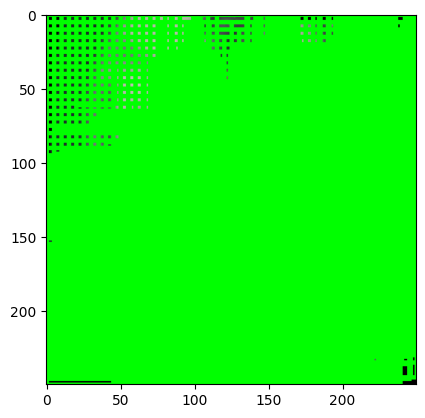

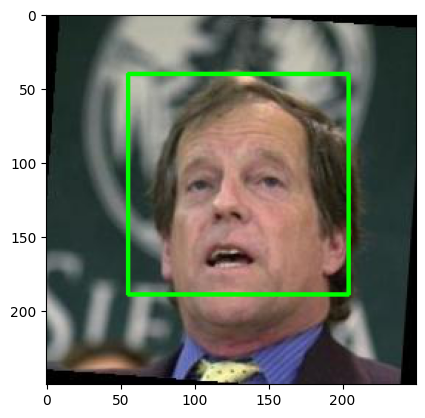

RGB
(250, 250)
{'Getting Subwindows': 0.09693455696105957, 'Resizing Subwindows': 0.4963517189025879, 'Normalize': 2.002716064453125e-05, 'Extracting Features': 0.3673722743988037, 'Classifying': 0.4407315254211426}


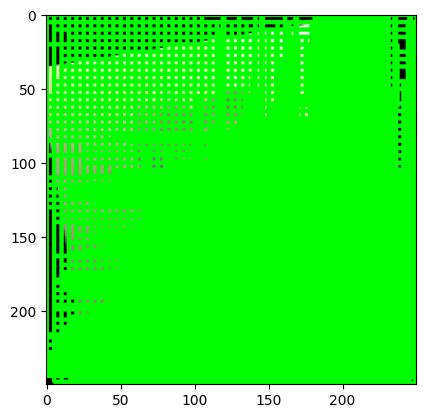

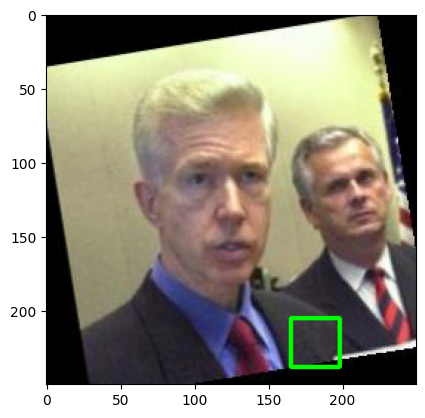

In [23]:
for i in show_images:
  # >>>> Read image <<<<
  img = Image.open(all_images_names[i])
  print(img.mode)
  img = np.array(img)
  org_sh = img.shape
  if not rectangles_only:
    plt.imshow(img)
    plt.show()
  # get subwindows
  img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  print(img2.shape)

  # >>>> Normalize image <<<<
  # normalize image
  # img2 = (img2 - img2.mean()) / img2.std()
  # img2 = cv2.resize(img, resize_to)
  # print(img2.shape)

  # img2 = cv2.normalize(img2, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
  # resize image
  # img2 = cv2.resize(img2, (570, 380))

  # show image
  if not rectangles_only:
    plt.imshow(img2, cmap='gray')
    plt.show()

  # +++++++++++++++++++++
  # find face
  # >>>> Find face <<<<
  face_coordinates, region_max_conf, max_conf , timing=\
                  find_face(img2, \
                              cascadeClassifier, \
                              feature_extractor, \
                              window_size=(19, 19), \
                              scale_dist=1.1, \
                              max_size=300, \
                              stride=5, \
                              device=device, \
                              verbose=False,
                              report_time=True)
  print(timing)
  # region_max_conf *= img.shape[0] / resize_to[0]
  # ++++++++++++++++++++
  # rectangles 
  # >>>> Draw rectangles <<<<
  tmp_img = img.copy()
  for face_coordinate in face_coordinates:
      for x1, y1, x2, y2 in face_coordinate:
          cv2.rectangle(tmp_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
  # if not rectangles_only:          
  plt.imshow(tmp_img)
  plt.show()

  # >>>> Draw rectangles with max confidence <<<<
  # amx confidence
  tmp_img = img.copy()
  x1, y1, x2, y2 = region_max_conf
  cv2.rectangle(tmp_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
  plt.imshow(tmp_img)
  plt.show()

